In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!apt-get install -y fonts-nanum

# NanumGothic 폰트를 Matplotlib의 기본 폰트로 설정
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/KOPIS/블루스퀘어/트레이닝_데이터(라벨인코딩).xlsx')
test_df = pd.read_excel('/content/drive/MyDrive/KOPIS/블루스퀘어/테스트_데이터(라벨인코딩).xlsx')

In [ ]:
df

,전송사업자코드,예매/취소방식코드,결제수단코드,할인금액,할인종류코드,장당금액,성별,판매좌석수,예매후남은일자,취소여부,연도,월,일,주말여부,공휴일여부,노인,청년,성인,좌석등급
0,1,0,1,0,1,161500,2,1309,33,0,2023,10,1,1,0,0,0,1,3
1,1,0,1,0,1,161500,2,1309,33,0,2023,10,1,1,0,0,0,1,3
2,1,0,1,0,1,161500,1,1309,33,0,2023,10,1,1,0,0,0,1,3
3,1,0,1,0,1,161500,2,1309,32,1,2023,10,1,1,0,0,0,1,3
4,1,0,1,0,1,161500,1,1309,33,1,2023,10,1,1,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284595,1,1,1,0,1,76000,2,1309,0,0,2023,8,31,0,0,0,0,1,0
284596,1,1,1,0,1,76000,2,1309,0,0,2023,8,31,0,0,0,0,1,0
284597,1,1,1,0,1,80000,1,1309,0,0,2023,8,31,0,0,0,0,1,0
284598,1,1,1,0,1,133000,1,1309,0,0,2023,8,31,0,0,0,1,0,1


## 랜덤포레스트

* 피쳐 임폴턴트 기준 상위 15개 선택   




In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

# Target 변수와 Feature 변수 설정
X_train = df.drop(columns=['취소여부'])
y_train = df['취소여부']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)




상위 피쳐 셀렉션

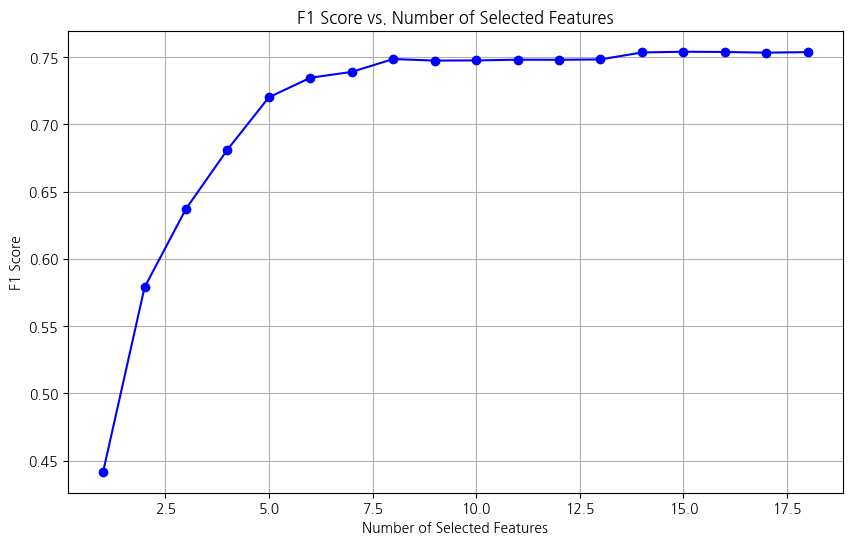

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

# 랜덤 포레스트 모델을 이용해 피처 중요도 계산
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
feature_importances = model.feature_importances_

# 피처 중요도에 따른 상위 n개 피처를 선택하고, F1 스코어를 비교
f1_scores = []
feature_counts = list(range(1, X_train.shape[1] + 1))

for n_top_features in feature_counts:
    # 상위 n개 피처 선택
    important_features = X_train.columns[np.argsort(feature_importances)[-n_top_features:]]

    # 선택된 피처만 사용하여 데이터셋 구성
    X_train_selected = X_train[important_features]
    X_test_selected = X_test[important_features]

    # 모델 학습 및 평가
    model_selected = RandomForestClassifier(random_state=42)
    model_selected.fit(X_train_selected, y_train)
    y_pred_selected = model_selected.predict(X_test_selected)

    # F1 스코어 계산
    f1 = f1_score(y_test, y_pred_selected)
    f1_scores.append(f1)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(feature_counts, f1_scores, marker='o', color='blue')
plt.xlabel('Number of Selected Features')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Number of Selected Features')
plt.grid(True)
plt.show()



<ipython-input-7-0e4a4f43f058>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features_top, y=features_top.index, palette='viridis')


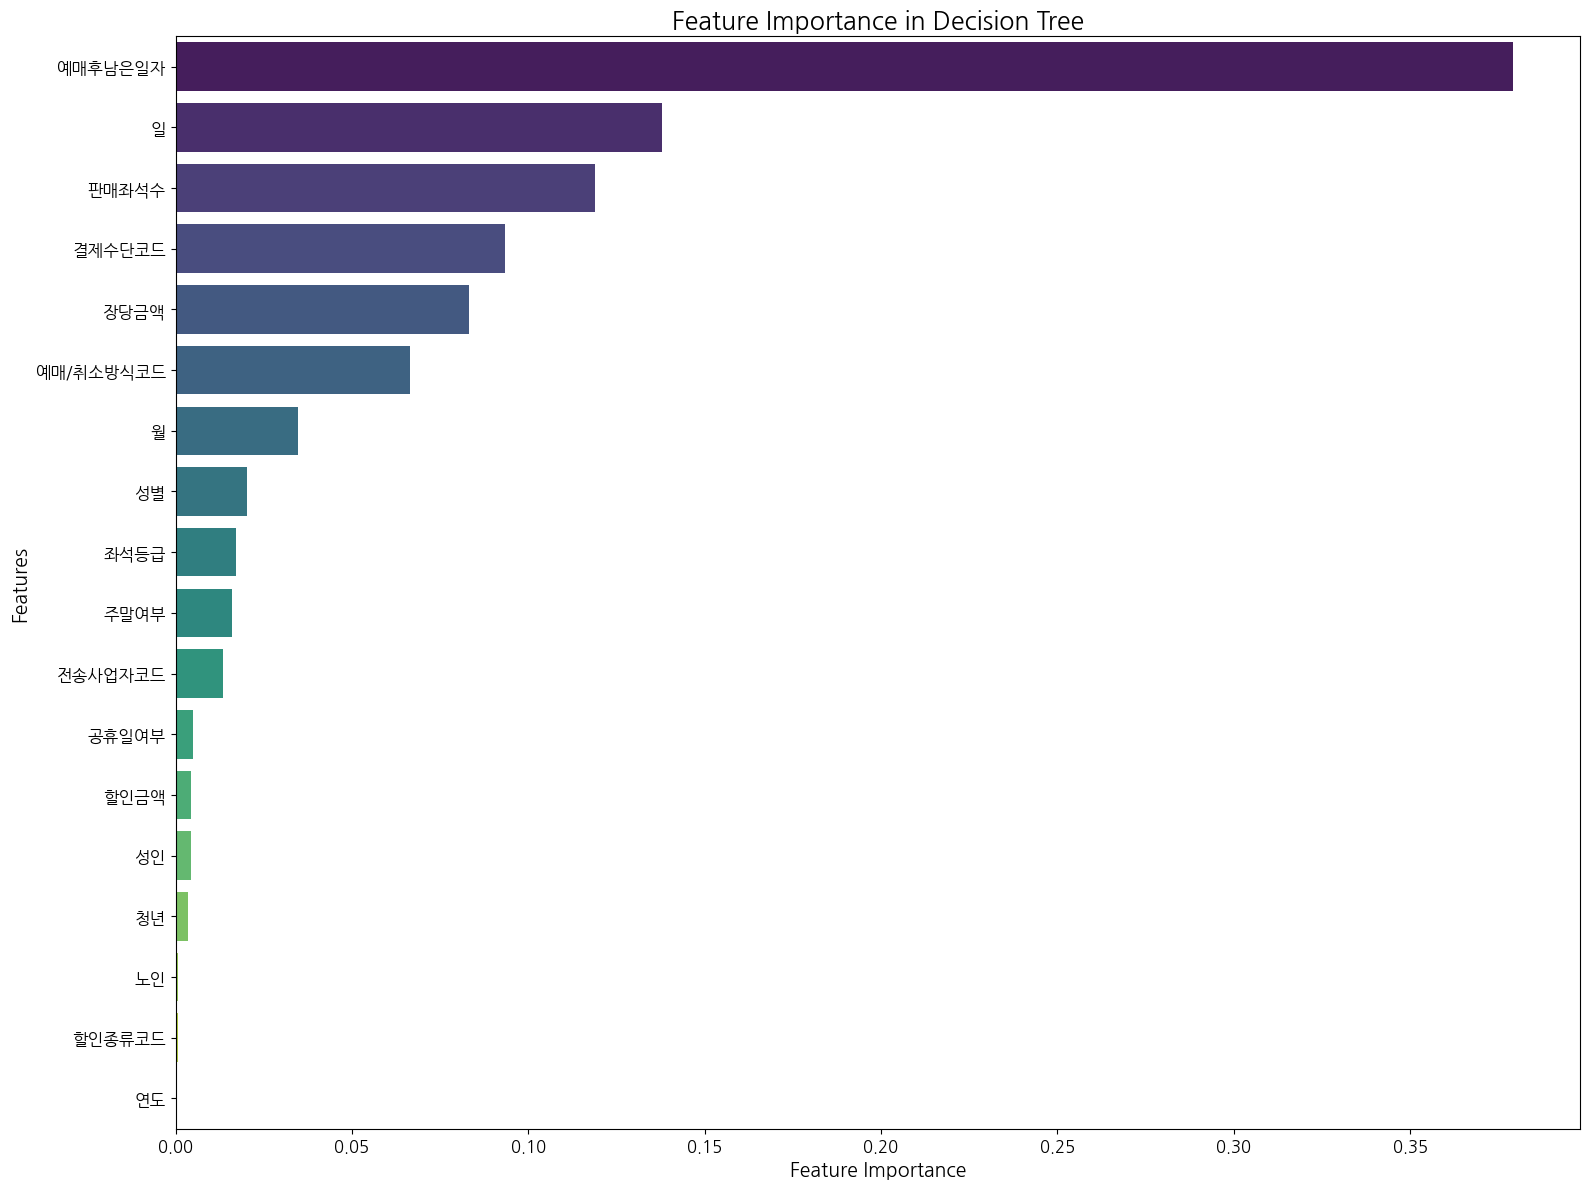

In [ ]:
# Feature Importance 추출
features_importance = model.feature_importances_
features_importance = pd.Series(features_importance, index=X_train.columns)
features_top = features_importance.sort_values(ascending=False)

# 시각화
plt.figure(figsize=(16, 12))
plt.title('Feature Importance in Decision Tree', fontsize=18)
sns.barplot(x=features_top, y=features_top.index, palette='viridis')
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # 레이아웃 조정
plt.show()

In [ ]:
# 최고의 성능을 보이는 n값 찾기
best_n = feature_counts[np.argmax(f1_scores)]
best_f1_score = max(f1_scores)

print(f"최고의 성능을 보이는 n값: {best_n}")
print(f"최고 F1 스코어: {best_f1_score}")

최고의 성능을 보이는 n값: 15
최고 F1 스코어: 0.7538888888888888


## 랜포 하이퍼 파라메타 튜닝
- 최적의 하이퍼파라미터: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}
최고의 F1 스코어: 0.7400473620428578

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import f1_score, classification_report
# from sklearn.model_selection import train_test_split, GridSearchCV

# # 최적의 n값으로 상위 15개 피처 선택
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)
# feature_importances = model.feature_importances_
# important_features = X_train.columns[np.argsort(feature_importances)[-15:]]

# # 선택된 피처만 사용하여 데이터셋 구성
# X_train_selected = X_train[important_features]
# X_test_selected = X_test[important_features]

# from sklearn.model_selection import RandomizedSearchCV

# # RandomizedSearchCV를 사용한 하이퍼파라미터 튜닝
# randomized_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=50, cv=5, scoring='f1', n_jobs=-1, random_state=42, verbose=2)
# randomized_search.fit(X_train_selected, y_train)

# # 최적의 하이퍼파라미터와 성능 출력
# print(f"최적의 하이퍼파라미터: {randomized_search.best_params_}")
# print(f"최고의 F1 스코어: {randomized_search.best_score_}")


##Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}

Train Accuracy: 0.8698
Train F1 Score: 0.8647
Train Precision: 0.8537
Train Recall: 0.8759

Train Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87    119564
           1       0.85      0.88      0.86    108116

    accuracy                           0.87    227680
   macro avg       0.87      0.87      0.87    227680
weighted avg       0.87      0.87      0.87    227680



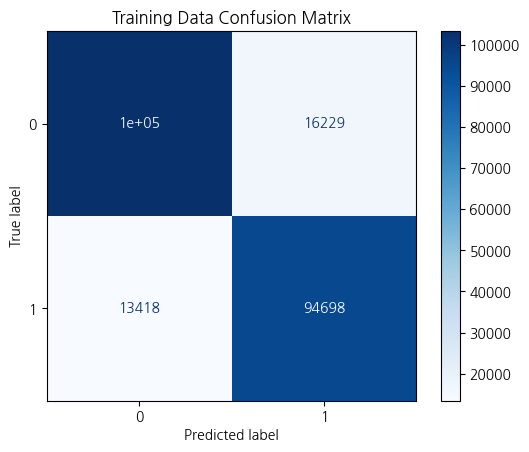

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Target 변수와 Feature 변수 설정
X_train = df.drop(columns=['취소여부'])
y_train = df['취소여부']

# Train-Test Split (모델 평가를 위해 테스트 데이터셋이 필요함)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 최적의 n값으로 상위 15개 피처 선택
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
feature_importances = model.feature_importances_
important_features = X_train.columns[np.argsort(feature_importances)[-15:]]

# 선택된 피처만 사용하여 데이터셋 구성
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

# 최적의 하이퍼파라미터로 모델 학습
best_params = {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train_selected, y_train)

# 트레이닝 데이터에서 성능 평가
train_pred = best_rf.predict(X_train_selected)
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_classification_rep = classification_report(y_train, train_pred)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Train F1 Score: {train_f1:.4f}')
print(f'Train Precision: {train_precision:.4f}')
print(f'Train Recall: {train_recall:.4f}')
print('\nTrain Classification Report:\n', train_classification_rep)

# 혼동 행렬 계산 (트레이닝 데이터)
conf_matrix_train = confusion_matrix(y_train, train_pred)

# 혼동 행렬 시각화 (트레이닝 데이터)
disp_train = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train)
disp_train.plot(cmap=plt.cm.Blues)
plt.title("Training Data Confusion Matrix")
plt.show()





Test Accuracy: 0.7665
Test F1 Score: 0.7539
Test Precision: 0.7482
Test Recall: 0.7597

Test Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.77      0.78     30126
           1       0.75      0.76      0.75     26794

    accuracy                           0.77     56920
   macro avg       0.77      0.77      0.77     56920
weighted avg       0.77      0.77      0.77     56920



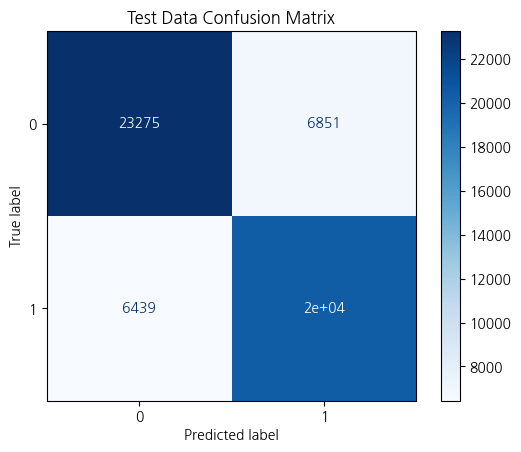

In [ ]:
# 테스트 데이터에서 성능 평가
test_pred = best_rf.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred)
test_recall = recall_score(y_test, test_pred)
test_classification_rep = classification_report(y_test, test_pred)

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test F1 Score: {test_f1:.4f}')
print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')
print('\nTest Classification Report:\n', test_classification_rep)

# 혼동 행렬 계산 (테스트 데이터)
conf_matrix_test = confusion_matrix(y_test, test_pred)

# 혼동 행렬 시각화 (테스트 데이터)
disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test)
disp_test.plot(cmap=plt.cm.Blues)
plt.title("Test Data Confusion Matrix")
plt.show()

In [ ]:
import joblib

# 최적의 하이퍼파라미터로 학습된 모델 저장
model_filename = '/content/drive/MyDrive/KOPIS/블루스퀘어/best_random_forest_model.pkl'
joblib.dump(best_rf, model_filename)

print(f"모델이 '{model_filename}'에 저장되었습니다.")


모델이 '/content/drive/MyDrive/KOPIS/블루스퀘어/best_random_forest_model.pkl'에 저장되었습니다.


In [ ]:
import joblib

model_filename = '/content/drive/MyDrive/KOPIS/블루스퀘어/best_random_forest_model.pkl'

# 저장된 모델 불러오기
loaded_model = joblib.load(model_filename)


## 실제 데이터(11월 19일)에 적용


In [ ]:
import pandas as pd

test_df = pd.read_excel('/content/drive/MyDrive/KOPIS/블루스퀘어/테스트_데이터(라벨인코딩).xlsx')

# 실제 데이터에는 2,644개의 데이터 중
# 1581개의 클래스 0 - 취소하지 않음  
# 1063개의 클래스 1 - 취소함으로 이루어져있다.

In [ ]:
# '취소여부' 칼럼의 클래스별 개수 계산
class_counts = test_df['취소여부'].value_counts()

# 결과 출력
print(class_counts)

취소여부
0    1581
1    1063
Name: count, dtype: int64


In [ ]:
# test_df에서 평가에 사용할 피처를 선택
important_features = X_train.columns[np.argsort(feature_importances)[-15:]]
X_test_selected = test_df[important_features]

# 타깃 변수(y_test)
y_new_test = test_df['취소여부']

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

# 불러온 모델로 예측 수행
y_pred_test = loaded_model.predict(X_test_selected)

# 클래스별로 예측된 개수 출력
unique, counts = np.unique(y_pred_test, return_counts=True)
class_distribution = dict(zip(unique, counts))

print("Predicted class distribution:")
for class_label, count in class_distribution.items():
    print(f"Class {class_label}: {count} samples")




Predicted class distribution:
Class 0: 1769 samples
Class 1: 875 samples


## 확률 값 만들기

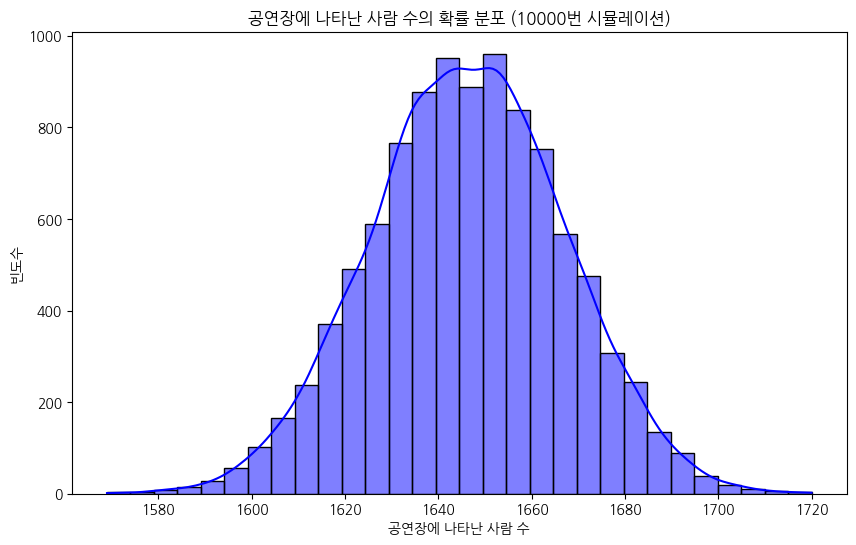

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

# 시뮬레이션 데이터 생성
# '취소안할확률' 칼럼 추출
probabilities = test_df['취소안할확률']

# 시뮬레이션 횟수
n_simulations = 10000

# 시뮬레이션 결과 저장 리스트
results = []

# 시뮬레이션 수행
for _ in range(n_simulations):
    # 각 관객이 나타날지 여부를 시뮬레이션
    attendance = np.random.binomial(n=1, p=probabilities)
    # 공연장에 나타난 사람 수를 계산하여 리스트에 추가
    results.append(attendance.sum())

# 시각화
plt.figure(figsize=(10, 6))
sns.histplot(results, kde=True, bins=30, color='blue')
plt.title('공연장에 나타난 사람 수의 확률 분포 (10000번 시뮬레이션)')
plt.xlabel('공연장에 나타난 사람 수')
plt.ylabel('빈도수')
plt.show()

In [ ]:
# 시뮬레이션 결과의 도수분포 계산
result_counts = pd.Series(results).value_counts().sort_index()

# 도수분포를 데이터프레임으로 변환
frequency_distribution = pd.DataFrame({'공연장에 나타난 사람 수': result_counts.index, '빈도수': result_counts.values})

# 도수분포를 엑셀 파일로 저장
frequency_distribution.to_excel('/content/drive/MyDrive/KOPIS/블루스퀘어/frequency_distribution_랜포(08-18).xlsx', index=False)

# 도수분포 데이터프레임 출력 (옵션, 확인용)
print(frequency_distribution)

     공연장에 나타난 사람 수  빈도수
0             1569    1
1             1572    1
2             1573    1
3             1577    1
4             1578    1
..             ...  ...
137           1714    1
138           1716    1
139           1718    1
140           1719    1
141           1720    1

[142 rows x 2 columns]
